## Experminet Notebook
This notebook includes the process of training multiple models, monitoring performance, comparison and model selection over the same dataset.

## 0. Table of Contents

## 1. Initialization

### Import Modules And Database

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from datetime import datetime
import seaborn as sns

If you're running on colab cpu but writing in vscode, run this once and comment the cell after success:

In [6]:
# !wget -O /content/KAG_energydata_complete.csv "https://raw.githubusercontent.com/KayloPortal/kaggle_appliances_energy_prediction/refs/heads/master/KAG_energydata_complete.csv"

# import os
# if os.path.exists('/content/KAG_energydata_complete.csv'):
#     print("Success! File is ready.")
# else:
#     print("Download failed.")

and run this code everytime you boot the kernel:

In [ ]:
# dataframe = pd.read_csv("/content/KAG_energydata_complete.csv")
# dataframe

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


otherwise, If you're running on your local machine, just run this code instead of the two cells above, to load the database each time you boot the kernel:

In [7]:
dataframe = pd.read_csv("./KAG_energydata_complete.csv")
dataframe

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## 2. Research Engine

A class to train models with different specifications in just one line.

In [8]:
class ModelCreator:
  def __init__(self, weekday_enc='ohe', hour_enc='ohe', reg_type='lasso', poly_deg=1, random_state=None, trainer=None, split_rate=0.2):
    self.params = {
      'weekday_enc': weekday_enc,
      'hour_enc': hour_enc,
      'reg_type': reg_type,
      'poly_deg': poly_deg,
      'random_state': random_state,
      'trainer': trainer,
      'split_rate': split_rate
    }
    # self.model = None
    # self.results = {}
    self.encoders = {
      'hour': None,
      'weekday': None
    }
    self.ohe_counts = None
    self.poly = None
    
  def __cyclic_encode(self, data, max_val):
    return np.column_stack([
        np.sin(2 * np.pi * data / max_val),
        np.cos(2 * np.pi * data / max_val)
    ])

  def __ohe_encode(self, data, key):
    if self.encoders[key] == None:
      encoder_data = OneHotEncoder(sparse_output=False)
      self.encoders[key] = encoder_data
      encoder_data.fit(data.reshape(-1, 1))
      # return (encoder_data.fit_transform(data.reshape(-1, 1)), encoder_data)
    return (self.encoders[key].transform(data.reshape(-1, 1)), self.encoders[key])
      

  def __binned_encode(self, data):
    pass
    
  def _process_dataframe(self, df):
    # --- Handle The Dataframe ---
    dataframe = df.copy()
    date_column = pd.to_datetime(dataframe['date'])
    hours = date_column.dt.hour.values # extracts hour column as [0, 0, ..., 2, 2, ...]
    weekdays = date_column.dt.weekday.values # extracting weekdays like [0, 0, ..., 1, 1, ...]
    dataframe = dataframe.drop('date', axis=1)
    
    # --- Handle Hour Encoding ---
    if self.params['hour_enc'] == 'ohe':
      hour_encoded, encoder_hour = self.__ohe_encode(hours, 'hour')
      hour_column_names = encoder_hour.get_feature_names_out(['hour'])
      self.encoder_hour = encoder_hour
    elif self.params['hour_enc'] == 'trig':
      hour_encoded = self.__cyclic_encode(hours, 24)
      hour_column_names = np.array(['hour_sin', 'hour_cos'])
    elif self.params['hour_enc'] == 'binned':
      pass
    else: raise Exception("this hour_enc is not supported or is not written correctly, please double check. supported hour_enc values: ohe, trig, binned")
    # put the hour-of-day into dataframe
    hour_encoded_df = pd.DataFrame(hour_encoded, columns=hour_column_names)
    dataframe = pd.concat([hour_encoded_df, dataframe], axis=1)
    
    # --- Handle Weekday Encoding ---   
    if self.params['weekday_enc'] == 'ohe':
      weekdays_encoded, encoder_weekdays = self.__ohe_encode(weekdays, 'weekday')
      weekdays_column_names = encoder_weekdays.get_feature_names_out(['weekday'])
    elif self.params['weekday_enc'] == 'trig':
      weekdays_encoded = self.__cyclic_encode(weekdays, 7)
      weekdays_column_names = np.array(['weekday_sin', 'weekday_cos'])
    elif self.params['weekday_enc'] == 'binned':
      pass
    # Putting weekday columns into dataframe
    week_encoded_df = pd.DataFrame(weekdays_encoded, columns=weekdays_column_names)
    dataframe = pd.concat([week_encoded_df, dataframe], axis=1)
    
    # --- Handle Polynomial Features ---
    if 'Appliances' in df:
      X = dataframe.drop('Appliances', axis=1)
      y = dataframe[['Appliances']]
    else:
      X = dataframe
      y = None
    
    if self.params['poly_deg'] > 1:
      if self.poly == None:
        poly = PolynomialFeatures(degree=self.params['poly_deg'], include_bias=False)
        X = poly.fit_transform(X)
        self.poly = poly
      else:
        poly = self.poly
        X = poly.transform(X)
      # Filtering out bad ohe combinations
      if self.ohe_counts == None:
        ohe_counts = []
        if self.params['weekday_enc'] == 'ohe':
          if self.params['hour_enc'] == 'ohe':
            ohe_counts = [(0, 7), (7, 7 + 24)]
          elif self.params['hour_enc'] == 'binned':
            pass
          elif self.params['hour_enc'] == 'trig':
            ohe_counts = [(0, 7)]
        if self.params['weekday_enc'] == 'trig':
          if self.params['hour_enc'] == 'ohe':
            ohe_counts = [(2, 2 + 24)]
          elif self.params['hour_enc'] == 'binned':
            pass
        if self.params['weekday_enc'] == 'binned':
          if self.params['hour_enc'] == 'ohe':
            pass
          elif self.params['hour_enc'] == 'binned':
            pass
          elif self.params['hour_enc'] == 'trig':
            pass
        self.ohe_counts = ohe_counts
        self.valid = []
        if len(ohe_counts) > 0:
          feature_powers = self.poly.powers_
          for i in range(len(feature_powers)):
            # if (feature_powers[i, ohe_counts[0][0]:ohe_counts[0][1]].sum() <= 1
            #     and feature_powers[i, ohe_counts[1][0]:ohe_counts[1][1]].sum() <= 1): self.valid.append(i)
            isValid = True
            for item in ohe_counts:
              if feature_powers[i, item[0]:item[1]].sum() > 1: isValid = False
            if isValid: self.valid.append(i)
      
      if len(self.ohe_counts) > 0:
        X = X[:, self.valid]
    return (X, y)      

  # def _extract_weekday(self, date_string: str) -> int:
  #   return datetime.strptime(date_string, "%Y-%m-%d").weekday()

  def fit(self, df):
    """Constructs the pipeline and trains it."""
    
    X, y = self._process_dataframe(df)

    # --- Split ---
    if self.params['split_rate'] == 0: 
      # This means we don't want to split our data, we want the model to be trained on the whole dataframe.
      # ATTENTION: You're allowed to use self.evaluate only when you've set the split_rate a positive number.
      X_train = X
      y_train = y
    else:
      # This means we want a test subset to be extracted from our dataframe
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.params['split_rate'], random_state=self.params['random_state'])
      y_test = y_test.values.squeeze()
      self.X_test = X_test
      self.y_test = y_test
    y_train = y_train.values.squeeze()
    self.X_train = X_train
    self.y_train = y_train
    
    # --- PipeLine: Feature scaling & Training ---
    if self.params['reg_type'] == 'lasso':
      if self.params['trainer'] == None:
        self.params['trainer'] = LassoCV(cv=5, random_state=self.params['random_state'], n_jobs=-1, max_iter=10000)
      self.pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', self.params['trainer'])
      ])
    elif self.params['reg_type'] == 'ridge':
      if self.params['trainer'] == None:
        self.params['trainer'] = RidgeCV()
      self.pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', self.params['trainer'])        
      ])
    elif self.params['reg_type'] == 'regressor':
      if self.params['trainer'] == None:
        self.params['trainer'] = LinearRegression()
      self.pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', self.params['trainer'])        
      ])
    else: raise Exception("this reg_type is not supported or is not written correctly, please double check. supported reg_type values: lasso, ridge, regressor")
  
    self.pipeline.fit(X_train, y_train)

    return self

  def predict(self, df, return_labels=False):
    """Gets raw dataframe and outputs model's predictions. Dataframe's structure should be exactly like the original dataframe, with the exception that including Appliance column is optional"""
    X, y = self._process_dataframe(df)
    y_pred = self.pipeline.predict(X)
    if return_labels: return (y_pred, y)
    return y_pred
    
  
  # def evaluate(self, X_test, y_test):
    # """Calculates metrics and stores them in self.results."""
    # y_pred = self.model.predict(X_test)
    # self.results['rmse'] = np.sqrt(mean_squared_error(y_test, y_pred))
    # self.results['r2'] = r2_score(y_test, y_pred)
    # return self.results

## 3. Training, Comparing And Analyzing Models

### 3.1 How to Use The Engine

In [4]:
# linear_model = ModelCreator(hour_enc='ohe', weekday_enc='ohe', poly_deg=1, reg_type='regressor', random_state=42
#                             , trainer=LinearRegression(random_state_24)) # Declare specifications
# linear_model.fit(dataframe) # Train the model
# y_pred = linear_model.pipeline.predict(linear_model.X_test) # Raise answers
# RMSE = np.sqrt(mean_squared_error(linear_model.y_test, y_pred)) # calculate error
# RMSE

### 3.2 Choosing The Proper Encoding For Linear(degree=1) Models

#### 3.2.1 Trigonometric vs. One-Hot Encoding

Four models were trained differing only in encoding methods.

The model with one-hot encoding for both variables has the highest ability of explaining the variance of the data(Highest $R^2$) along with lowest average prediction inaccuracy(lowest RMSE on both train and test). But it's obvious that all these models are underfitting, giving us inaccurate results, we can see this by comparing MAE(represents average distance between the model's predicted value and actual value) $MAE=50.88(Wh)$ to average(mean) energy consumption in our data $mean=97.69(Wh)$. The model's average innaccuracy is too high compared to average value of our target.

As a conclusion, models have the same performance on eliminating rv1 and rv2 and same test/train ratio, hence the ohe+ohe model is generally better in this table due to its better RMSE and $R^2$.

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Test MAE | rv1 | rv2 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | lasso | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 50.88 | 0.258 | 0.000 |
| 1 | ohe | trig | lasso | 0.232 | 0.228 | 90.37 | 87.92 | 0.973 | 50.85 | 0.271 | 0.000 |
| 1 | trig | ohe | lasso | 0.203 | 0.205 | 92.08 | 89.19 | 0.969 | 51.68 | -0.013 | -0.000 |
| 1 | trig | trig | lasso | 0.200 | 0.201 | 92.26 | 89.40 | 0.969 | 51.62 | -0.001 | -0.000 |

#### 3.2.2 Code

In [9]:
def print_metrics(model, params):
    # 2. Get Metrics
    # (Using the evaluate method logic we discussed)
    y_train_pred = model.pipeline.predict(model.X_train)
    y_test_pred = model.pipeline.predict(model.X_test)
    
    tr_r2 = r2_score(model.y_train, y_train_pred)
    ts_r2 = r2_score(model.y_test, y_test_pred)
    tr_rmse = np.sqrt(mean_squared_error(model.y_train, y_train_pred))
    ts_rmse = np.sqrt(mean_squared_error(model.y_test, y_test_pred))
    
    mae = mean_absolute_error(model.y_test, y_test_pred)
    
    rmse_ratio = ts_rmse / tr_rmse
    
    w_rv1 = model.pipeline.named_steps[params['reg_type']].coef_[-2]
    w_rv2 = model.pipeline.named_steps[params['reg_type']].coef_[-1]
    
    # 3. Print Markdown Row
    print(f"| {params['poly_deg']} | {params['hour_enc']} | {params['weekday_enc']} | {params['reg_type']} | "
          f"{tr_r2:.3f} | {ts_r2:.3f} | {tr_rmse:.2f} | {ts_rmse:.2f} | {rmse_ratio:.3f} | {mae:.2f} | {w_rv1:.3f} | {w_rv2:.3f} |")

In [10]:
# Define your experimental grid
experiments = [
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, n_jobs=-1, max_iter=10000)},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'trig', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, n_jobs=-1, max_iter=10000)},
    {'poly_deg': 1, 'hour_enc': 'trig', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, n_jobs=-1, max_iter=10000)},
    {'poly_deg': 1, 'hour_enc': 'trig', 'weekday_enc': 'trig', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, n_jobs=-1, max_iter=10000)},
]

print("| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Test MAE | rv1 | rv2 |")
print("|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|")

for params in experiments:
    # 1. Initialize and Fit
    model = ModelCreator(**params, random_state=42)
    model.fit(dataframe) # Assuming your raw data is in 'dataframe'
    print_metrics(model, params)

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Test MAE | rv1 | rv2 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | lasso | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 50.88 | 0.258 | 0.000 |
| 1 | ohe | trig | lasso | 0.232 | 0.228 | 90.37 | 87.92 | 0.973 | 50.85 | 0.271 | 0.000 |
| 1 | trig | ohe | lasso | 0.203 | 0.205 | 92.08 | 89.19 | 0.969 | 51.68 | -0.013 | -0.000 |
| 1 | trig | trig | lasso | 0.200 | 0.201 | 92.26 | 89.40 | 0.969 | 51.62 | -0.001 | -0.000 |


### 3.3 Choosing The Proper Regularization For Linear(degree=1) Models

#### 3.3.1 Regularization Fails to Impact Underfitting Models, $\lambda$ Becomes Zero

We concluded from the previous cell that OHE encoding is the best for our linear models. This time, four models with different regularization methods were tested and they all gave the same results. The reason to this is obvious, we talked earlier briefly in the ReadMe that $\lambda$ tries to move the model in bias-variance tradeoff towards the sweetspot. Our linear model is underfitting, it has high bias and low variance, therefore the model tries to increase the model's variance to move it towards the sweetspot by decreasing $\lambda$, but it reaches the model's boundries, meaning $\lambda$ gets near zero and tries it best to increase the variance, but the model has reached its limits and it can't go further(can't have more variance). Hence, all models, regardless of their regularization method, reach the same spot.

In another words, even when $\lambda = 0$(normal regression without regularization) the model is underfitting, meaning it has high bias and what it needs is more variance, and any $\lambda > 0$ provides less variance, hence, the model tries to push $\lambda$ towards zero, pushing all regulrazied regressions towards becoming a normal regression without regularization, therefore all four models end up being the same(not excatly the same, but almost identical).

Considering the observations above, we conclude that when our model is underfitting, there's nothing regularization L1 or L2 can do, but to give us the same model we had. Utilizing regularization methods like L1 and L2 when the model is underfitting doesn't provide any value.

Regularization is meant to reduce model's complexity to decrease variance, using it when the model is too simple and needs more variance doesn't help, therefore, the best linear model with degree one is a regular linear regression model with one-hot encoded weekdays and hours but without regularization.

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Best $\lambda$ | rv1 | rv2 | CrossVal |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | lasso | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 0.0197 | 0.258 | 0.000 | 5 Folds |
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 11.4976 | 0.139 | 0.139 | LOOCV |
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 11.4976 | 0.139 | 0.139 | 5 Folds |
| 1 | ohe | ohe | regressor | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | - | 0.142 | 0.142 | - |

#### 3.3.2 Numerical Stalemate: Why Didn't Ridge $\lambda$ Become Zero?

But you might ask, if L1 and L2 try to push the $\lambda$ to zero for this model, why does this happens for lasso($\lambda = 0.0197$) but not for ridge($\lambda = 11.4976$)? Even when we try to train a ridge model with alphas=[0.0197, 11.4976], we expect the model to pick the less lambda based on the logic we provided above to increase the model's variance, but it picks 11.4976(check the code below to see), does this mean our logic is wrong? Well, not percisely.

While it seems that ridge is working against this logic, this is not actually true. I trained two ridge models, one with $\lambda = 0.0197$ and another with $\lambda = 11.4976$, By looking at the table below, they both raised the same results! This means both $\lambda$ values give our model almost the same variance, they both create the same model. But why?

The reason comes from how Ridge treats our data. Lasso is much more aggressive in penalizing variance comparing to Ridge, hence it's much more sensitive to changing the value of $\lambda$. As shown in the table below, the same change for $\lambda$ effects Lasso regression remarkably while Ridge regression stays almost the same.

But if ridge regression with $\lambda = 0.0197$ and $\lambda = 11.4976$ are almost identical, why doesn't the model choose the lower lambda? that lower lambda might have the same performance but just be a little bit better, but this amount is so small the model can't see it properly.

Our data is noisy, and K-Fold cross validation isn't perfect. Lasso with $\lambda = 0.0197$ might be $0.00001$ better in performance, but the noise and very little uncontrolable bias that can happen in K-Fold CV, can hide this fact, making the model think $\lambda = 11.4976$ is an option that's a little bit better.

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Fixed $\lambda$ | rv1 | rv2 | CrossVal |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | 0.0197 | 0.142 | 0.142 | 5 Folds |
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 11.4976 | 0.139 | 0.139 | 5 Folds |
| 1 | ohe | ohe | lasso | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 0.0197 | 0.258 | 0.000 | 5 Folds |
| 1 | ohe | ohe | lasso | 0.056 | 0.060 | 100.22 | 97.01 | 0.968 | 11.4976 | -0.000 | -0.000 | 5 Folds |

#### 3.3.3 Bias-Variance Tradeoff - Visual Graph

Here's a visual summary:

<img src="./visuals/diagram-bias-variance-tradeoff.png" alt="bias variance tradeoff explained with diagram" >

In [7]:
# Define your experimental grid
alphas = np.logspace(-3, 3, 100)
experiments = [
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, n_jobs=-1, max_iter=10000)},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=None, alphas=alphas)},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=alphas)},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'regressor', 'trainer': LinearRegression()},
    # {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=[0.0197, 11.4976])},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=[0.0197])},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=[11.4976])},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, alphas=[0.0197], random_state=24, n_jobs=-1, max_iter=10000)},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, alphas=[11.4976], random_state=24, n_jobs=-1, max_iter=10000)},
]

print("| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Best $\\lambda$ | rv1 | rv2 |")
print("|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|")

for params in experiments:
    # 1. Initialize and Fit
    model = ModelCreator(**params, random_state=42)
    model.fit(dataframe) # Assuming your raw data is in 'dataframe'
    
    # 2. Get Metrics
    # (Using the evaluate method logic we discussed)
    y_train_pred = model.pipeline.predict(model.X_train)
    y_test_pred = model.pipeline.predict(model.X_test)
    
    tr_r2 = r2_score(model.y_train, y_train_pred)
    ts_r2 = r2_score(model.y_test, y_test_pred)
    tr_rmse = np.sqrt(mean_squared_error(model.y_train, y_train_pred))
    ts_rmse = np.sqrt(mean_squared_error(model.y_test, y_test_pred))
    
    rmse_ratio = ts_rmse / tr_rmse
    
    w_rv1 = model.pipeline.named_steps[params['reg_type']].coef_[-2]
    w_rv2 = model.pipeline.named_steps[params['reg_type']].coef_[-1]
    
    try:
        alpha = model.pipeline.named_steps[params['reg_type']].alpha_
    except AttributeError: alpha = -1
    
    # 3. Print Markdown Row
    print(f"| {params['poly_deg']} | {params['hour_enc']} | {params['weekday_enc']} | {params['reg_type']} | "
          f"{tr_r2:.3f} | {ts_r2:.3f} | {tr_rmse:.2f} | {ts_rmse:.2f} | {rmse_ratio:.3f} | {alpha:.4f} | {w_rv1:.3f} | {w_rv2:.3f} |")

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Best $\lambda$ | rv1 | rv2 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | lasso | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 0.0197 | 0.258 | 0.000 |
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 11.4976 | 0.139 | 0.139 |
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 11.4976 | 0.139 | 0.139 |
| 1 | ohe | ohe | regressor | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | -1.0000 | 0.142 | 0.142 |
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | 0.0197 | 0.142 | 0.142 |
| 1 | ohe | ohe | ridge | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 11.4976 | 0.139 | 0.139 |
| 1 | ohe | ohe | lasso | 0.235 | 0.232 | 90.19 | 87.68 | 0.972 | 0.0197 | 0.258 | 0.000 |
| 1 | ohe | ohe | lasso | 0.056 | 0.060 | 100.22 | 97.01 | 0.968 | 11.4976 | -0.000 | -0.000 |


#### 3.3.4 Final Look: Experiment Confirms Our Claim

We saw that one-hot encoding worked best for lasso. Now that we have chosen normal regression without regularization, lets see if this is also true for this model:

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Test MAE | rv1 | rv2 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | regressor | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | 50.92 | 0.142 | 0.142 |
| 1 | ohe | trig | regressor | 0.232 | 0.227 | 90.37 | 87.93 | 0.973 | 50.89 | 0.149 | 0.149 |
| 1 | trig | ohe | regressor | 0.203 | 0.205 | 92.08 | 89.20 | 0.969 | 51.71 | -0.022 | -0.022 |
| 1 | trig | trig | regressor | 0.200 | 0.201 | 92.25 | 89.42 | 0.969 | 51.65 | -0.018 | -0.018 |

As expected, we got the same table we got for lasso. This is just an experimental proof for all the logic and theory we discussed earlier. Regression with lasso, with ridge, or with neither, they all give the same performance, because the model is underfitting and lacking variance. This is why we got the same table.

#### 3.3.5 Code

In [11]:
experiments = [
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'regressor', 'trainer': LinearRegression()},
    {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'trig', 'reg_type': 'regressor', 'trainer': LinearRegression()},
    {'poly_deg': 1, 'hour_enc': 'trig', 'weekday_enc': 'ohe', 'reg_type': 'regressor', 'trainer': LinearRegression()},
    {'poly_deg': 1, 'hour_enc': 'trig', 'weekday_enc': 'trig', 'reg_type': 'regressor', 'trainer': LinearRegression()},
]

print("| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Test MAE | rv1 | rv2 |")
print("|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|")

for params in experiments:
    model = ModelCreator(**params, random_state=42)
    model.fit(dataframe)
    print_metrics(model, params)

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Test MAE | rv1 | rv2 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | regressor | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | 50.92 | 0.142 | 0.142 |
| 1 | ohe | trig | regressor | 0.232 | 0.227 | 90.37 | 87.93 | 0.973 | 50.89 | 0.149 | 0.149 |
| 1 | trig | ohe | regressor | 0.203 | 0.205 | 92.08 | 89.20 | 0.969 | 51.71 | -0.022 | -0.022 |
| 1 | trig | trig | regressor | 0.200 | 0.201 | 92.25 | 89.42 | 0.969 | 51.65 | -0.018 | -0.018 |


### 3.4 Choosing The Best Polynomial Model(degree two)

#### 3.4.1 Why to Use Degree=2 Models?

As we saw, linear models with degree one could not explain our data properly. They were underfitting, lacking variance. Therefore, we increase the complexity of our model by changing its polynomial degree to two, to get a model with higher variance that has more chance to learn our data, due to its flexiblity to learn new patterns and less bias on the patterns it already knows.

#### 3.4.2 How I Tuned LassoCV to Converge

When training a lasso regression with one-hot encoded columns, I got a 'ConvergenceWarning' from scikit-learn. The data had over 1400 features with high multicollinearity due to a lot of columns representing same information or representing information that can be extracted from other columns. These multicollinearities happen often with noisy datasets like the one we are working with right now.

Becuase the data had a lot of redunant features, the loss function plot's shape had become nearly flat around the optimal point. Lasso takes steps in a path towards that optimal point, and when it gets close, the shape becomes flat meaning lasso will take smaller and smaller steps, when we get to a point that we have taken lots of steps but we haven't reached the optimal point yet. This was the reason why we got the 'ConvergenceWarning' warning.

To fix this problem, the hyperparmeters tol and max_iter needed to be tuned properly. max_iter is the maximum number of steps our lasso model takes to reach the optimal point. And to know about tol, first we have to know what is $Duality Gap$.

Computations aren't perfect. Computer can not always reach the exact optimal spot, but it can get very close to it, by taking steps in a path towards the point and stopping somewhere near the optimal point. To determine when we should stop, we define duality gap. Duality gap is the difference of the theoretical possible minimum for our cost function and the current value of our cost function. The theoretical minimums is calculated using mathematic relations. We can think of duality gap as the distance is left to reach the optimal point. Hence, we define tol. We tell the model that if your distance from the optimal point(duality gap) is less than the value of tol, you are close enough(convergence has happened), you are good to stop computations and consider the weights of the current spot as an answer.

$$\text{Duality Gap} = \text{Current Cost (Primal)} - \text{Theoretical Floor (Dual)}$$

The problem of our model was that it would stop in a spot that was not close enough to the optimal spot($Duality Gap > tol$) because it had reached the maximum number of steps it could take(max_iter). This means that convergence didn't happen, resulting in a 'ConvergenceWarning'. The model had finished the training and all the process without error, but its answer is not accurate and 'good enough'. Therefore, by increasing the value of tol and max_iter, we can make sure convergence happens.

The cost function used in LassoCV is:

$$J(w) = \frac{1}{2n_{\text{samples}}} \|y - Xw\|_2^2 + \alpha \|w\|_1$$

The second term is L1 norm, the first term is actually $\frac{1}{2} MSE$. It's clear that $2 \times J(w) > MSE$ and $J_{\text{answer}}(w) - J_{\text{theoretical minimum}}(w) < tol$ and $MAE < MSE$. This means the difference of our final $MAE$ and the smallest possible $MAE$ is guaranteed to be smaller than two times the value of our $tol$. This logic helps us to increase $tol$ with open eyes without making the model too much inaccurate.

$MAE$ shows the average innaccuracy of our model in predicting the target variable. Our target variable has an average(mean) value of 97.69(Wh). Hence, if the average error of our model is 0.05(Wh) more than the best $MAE$, it's still good, hence $tol=0.1$ seems like a good number. The previous $tol=10^{-4}$ was an overkill for this dataset.

This increase in $tol$ means the model can reach a spot with more distance from the optimal value than before, but still be considered as a convergence. This makes the destination more accessible, increasing the probablity that convergence happens in a fair amount of steps. But still, we have to increase max_iter to let the model be able to take more steps, again increasing convergence probablity. $40000$ seems like a good number.

#### 3.4.3 Training The Models (code)

let's train the models and compare them at the end

In [17]:
def print_metrics(model, params):
    y_train_pred = model.pipeline.predict(model.X_train)
    y_test_pred = model.pipeline.predict(model.X_test)
    
    tr_r2 = r2_score(model.y_train, y_train_pred)
    ts_r2 = r2_score(model.y_test, y_test_pred)
    tr_rmse = np.sqrt(mean_squared_error(model.y_train, y_train_pred))
    ts_rmse = np.sqrt(mean_squared_error(model.y_test, y_test_pred))
    
    rmse_ratio = ts_rmse / tr_rmse
    r2_ratio = ts_r2 / tr_r2
    
    w_rv1 = model.pipeline.named_steps[params['reg_type']].coef_[-2]
    w_rv2 = model.pipeline.named_steps[params['reg_type']].coef_[-1]
    
    try:
        alpha = model.pipeline.named_steps[params['reg_type']].alpha_
    except AttributeError: alpha = -1    
    
    print(f"| {params['poly_deg']} | {params['hour_enc']} | {params['weekday_enc']} | {params['reg_type']} | "
          f"{tr_r2:.3f} | {ts_r2:.3f} | {tr_rmse:.2f} | {ts_rmse:.2f} | {rmse_ratio:.3f} | {r2_ratio:.3f} | {alpha:.4f} | {w_rv1:.3f} | {w_rv2:.3f} |")

In [10]:
# Define your experimental grid
experiments = [
    {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)},
]
lasso_ohe_ohe = ModelCreator(**experiments[0], random_state=42)
lasso_ohe_ohe.fit(dataframe)

In [29]:
experiments = [
    {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)},
]
print("| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Ratio($R^2$) | best $\\lambda$ | rv1 | rv2")
print("|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|")
print_metrics(lasso_ohe_ohe, experiments[0])

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Ratio($R^2$) | best $\lambda$ | rv1 | rv2
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 2 | ohe | ohe | lasso | 0.392 | 0.333 | 80.45 | 81.70 | 1.016 | 0.850 | 0.0201 | -0.0 | -0.0 |


In [15]:
experiments = [
    {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'trig', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)},
]
lasso_ohe_trig = ModelCreator(**experiments[0], random_state=42)
lasso_ohe_trig.fit(dataframe)

In [ ]:
experiments = [
    {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)},
]
lasso_trig_ohe = ModelCreator(**experiments[0], random_state=42)
lasso_trig_ohe.fit(dataframe)

In [ ]:
experiments = [
    {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'trig', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)},
]
lasso_trig_trig = ModelCreator(**experiments[0], random_state=42)
lasso_trig_trig.fit(dataframe)

In [30]:
experiments = [{'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'trig', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)},
               {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)},
               {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'trig', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)}
               ]
print_metrics(lasso_ohe_trig, experiments[0])
print_metrics(lasso_trig_ohe, experiments[1])
print_metrics(lasso_trig_trig, experiments[2])

| 2 | ohe | trig | lasso | 0.368 | 0.322 | 82.02 | 82.39 | 1.005 | 0.875 | 0.0201 | -0.0 | -0.0 |
| 2 | trig | ohe | lasso | 0.324 | 0.296 | 84.78 | 83.91 | 0.990 | 0.914 | 0.0251 | -0.0 | -0.0 |
| 2 | trig | trig | lasso | 0.302 | 0.284 | 86.17 | 84.63 | 0.982 | 0.941 | 0.0251 | -7.920922314021879e-16 | -7.920922314021879e-16 |


In [32]:
experiments = [
    {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=None, alphas=alphas)},
    {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'trig', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=None, alphas=alphas)},
    {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=None, alphas=alphas)},
    {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'trig', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=None, alphas=alphas)}
]

for params in experiments:
    model = ModelCreator(**params, random_state=42)
    model.fit(dataframe)
    print_metrics(model, params)

| 2 | ohe | ohe | ridge | 0.473 | 0.347 | 74.86 | 80.84 | 1.080 | 0.733 | 0.0071 | -0.08808101384147449 | -0.08808101384147449 |
| 2 | ohe | trig | ridge | 0.445 | 0.343 | 76.83 | 81.08 | 1.055 | 0.771 | 0.0040 | -0.045100273189746076 | -0.045100273189746076 |
| 2 | trig | ohe | ridge | 0.403 | 0.331 | 79.69 | 81.80 | 1.027 | 0.822 | 0.0035 | -0.04664192794371047 | -0.04664193069402245 |
| 2 | trig | trig | ridge | 0.374 | 0.324 | 81.60 | 82.24 | 1.008 | 0.867 | 0.0023 | -0.01834038327433518 | -0.01834038327433518 |


In [21]:
alphas = np.logspace(-3, 3, 100)

experiments = [
    {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=alphas)},
    {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'trig', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=alphas)},
    {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'ohe', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=alphas)},
    {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'trig', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=5, alphas=alphas)}
]

for params in experiments:
    model = ModelCreator(**params, random_state=42)
    model.fit(dataframe)
    print_metrics(model, params)

| 2 | ohe | ohe | ridge | 0.472 | 0.347 | 74.97 | 80.86 | 1.079 | 0.735 | 0.0142 |
| 2 | ohe | trig | ridge | 0.444 | 0.343 | 76.90 | 81.09 | 1.055 | 0.772 | 0.0071 |
| 2 | trig | ohe | ridge | 0.402 | 0.331 | 79.73 | 81.80 | 1.026 | 0.823 | 0.0053 |
| 2 | trig | trig | ridge | 0.373 | 0.324 | 81.64 | 82.24 | 1.007 | 0.868 | 0.0040 |


#### 3.4.4 Analyzing Degree=2 Models

##### Table-1 Lasso Models

RMSE Ratios are almost identical, but $R^2$ ratios differ remarkably. Due to better Ratio, models with trig encoding are more stable but less accurate, due to higher RMSE and lower $R^2$. While the ohe+ohe model has less stability, it still stable enough $R^2_{test}/R^2_{train} = 0.85$. Therefore we choose the ohe+ohe model for its better performance(RMSE & $R^2$) over the test set.

By looking at the training time, we can see the theory we discussed earlier in the ReadMe. Models with one-hot encoding have a slower training as it is obvious in the table, due to high number of columns they create. All models are clearly underfitting, due to Train RMSE & Test RMSE being almost indentical(close to one RMSE ratio, very stable), but both RMSE metrics are very high compared to the mean of the target value. This underfitting is the reason why $\lambda$ is very close to zero again. All models have also successfully handled the random noise, again confirming that the model is not overfitting.

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Ratio($R^2$) | best $\lambda$ | rv1 | rv2 | CrossVal | Training Time |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 2 | ohe | ohe | lasso | 0.392 | 0.333 | 80.45 | 81.70 | 1.016 | 0.850 | 0.0201 | -0.0 | -0.0 | 5-Folds | 295.5(s) |
| 2 | ohe | trig | lasso | 0.368 | 0.322 | 82.02 | 82.39 | 1.005 | 0.875 | 0.0201 | -0.0 | -0.0 | 5-Folds | 260.8(s) |
| 2 | trig | ohe | lasso | 0.324 | 0.296 | 84.78 | 83.91 | 0.990 | 0.914 | 0.0251 | -0.0 | -0.0 | 5-Folds | 161.4(s) |
| 2 | trig | trig | lasso | 0.302 | 0.284 | 86.17 | 84.63 | 0.982 | 0.941 | 0.0251 | -7.92e-16 | -7.92e-16 | 5-Folds | 153.6(s) |

##### Table-2: Ridge Models

By replacing trigonometric encoding with one-hot encoding, Test $R^2$ stays the same, the models ability to explain the test set does not change, but the Train $R^2$ increases. This increase means the model is learning more, because it can explain more of the training set, but what it is learning is noise, not patterns, therefore the model can explain the training data better but its ability to explain unseen data remains the same. we can see the same pattern for RMSE. In another words, replacing trig encoding with one-hot pushes the model towards overfitting. The lower $R^2$ ratio in ridge+ohe models confirms this fact.

In short, all models have almost the same performance on the test set but the fourth model(trig+trig+ridge) has better generalization and is more stable, due to its better ratios. hence it's the best ridge model out of this list. It's also more efficient due to less amount of features it creates.

The weights chosen for random variables also acknowledge the claim. while all models successfully determined these variables are irrelevant to our target hence minimized their weights, the trig+trig model has gave them weights that are four times less than the weights in ohe+ohe. This means that ohe+ohe model is more hallucinating compared to the fourth model, confirming the overfitting claim.

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Ratio($R^2$) | best $\lambda$ | rv1 | rv2 | CrossVal |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 2 | ohe | ohe | ridge | 0.473 | 0.347 | 74.86 | 80.84 | 1.080 | 0.733 | 0.0071 | -0.088 | -0.088 | LOOCV |
| 2 | ohe | trig | ridge | 0.445 | 0.343 | 76.83 | 81.08 | 1.055 | 0.771 | 0.0040 | -0.045 | -0.045 | LOOCV |
| 2 | trig | ohe | ridge | 0.403 | 0.331 | 79.69 | 81.80 | 1.027 | 0.822 | 0.0035 | -0.046 | -0.046 | LOOCV |
| 2 | trig | trig | ridge | 0.374 | 0.324 | 81.60 | 82.24 | 1.008 | 0.867 | 0.0023 | -0.018 | -0.018 | LOOCV |

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Ratio($R^2$) | best $\lambda$ | CrossVal |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 2 | ohe | ohe | ridge | 0.472 | 0.347 | 74.97 | 80.86 | 1.079 | 0.735 | 0.0142 | 5 Folds |
| 2 | ohe | trig | ridge | 0.444 | 0.343 | 76.90 | 81.09 | 1.055 | 0.772 | 0.0071 | 5 Folds |
| 2 | trig | ohe | ridge | 0.402 | 0.331 | 79.73 | 81.80 | 1.026 | 0.823 | 0.0053 | 5 Folds |
| 2 | trig | trig | ridge | 0.373 | 0.324 | 81.64 | 82.24 | 1.007 | 0.868 | 0.0040 | 5 Folds |

### 3.5 Why We Should not Go For Higher Degrees

We increased the degree of our model to 2, but still, the model has a very high error $RMSE=80(Wh)$ compared to average value of our dataset $mean=97.69(Wh)$. This might lead us to consider training more complex models(degree > 3) to decrease this error, but that is not possible.

Our dataset has around 20,000 rows, and our models have 32-59 columns based on their encoding method. The number of features after applying a degree $d$ polynomial features on a dataset with $P$ columns is:

$$\binom{P + d}{d} = \frac{(P + d)!}{P! d!}$$

This means we will have:

| Columns ($n$) | Degree 2 Features | Degree 3 Features | Degree 4 Features |
| :---: | :---: | :---: | :---: |
| **32** | 561 | 6,545 | 52,360 |
| **59** | 1,830 | 37,820 | 595,665 |

To prevent overfitting, it is suggested to have an $N/P$ ratio over 10 in normal cases and 20 for noisy datasets, where $N$ is the number of samples(rows) and $P$ is the number of features(columns). To train a degree three model without the risk of overfitting, we need at least 60,000 rows, while we only have 20,000. Hence, we don't go for higher degrees.

You might say that the data filtering we implemented to eliminate OHE-OHE columns will decrease the number of features, but even with data filtering, the number of features in degree three is much more than the boundary our number of rows can handle.

## 4. Final Comparison

#### 4.1 Introducing The Best Model

So far, we have selected three models out of 16 models, one linear, one polynomial with L1 and another polynomial with L2. Now it's time to compare, plot, and explain. 

Lasso model has a slightly(~1%) better $RMSE$ & $R^2$ comparing to the ridge model but it's 30 times slower in terms of convergence speed. Also considering they are almost the same in other metrics, ridge is preferred over lasso in this table. This leaves us with degree two ridge and degree one normal regression (no regularization). Both have good acceptable ratios for $R^2$ and $RMSE$, but ratios for the normal regression is better, signaling more stability. Ridge has identified noise variables better and gave them less weights comparing to degree one model. It also makes more accurate predictions, the better $R^2$ and $RMSE$ values acknowledge this fact, this covers the worse ratios it has.

If we aim for a balance in accuracy and stability, Ridge has good enough ratios (but not perfect) with more accurate predictions, hence, **the ridge model with trigonomteric encoding seems to be the best out of all the models we have trained.**. The degree one regression model might be nearly perfect in ratios, but it's remarkably less accurate.

All the models we have trained so far, despite all the improvments, are underfitting. This can be seen by looking at RMSE. All models have a high RMSE on train and test compared to the mean of the target variable. But why? we did regularizations, encodings, why didn't we reach a practical model we can use in real world? The reason to this is **noise**.

The target variable we're predicting depends on many factors that do not exist in the given dataset. This is where we say *our data is noisy*. Energy consumption is effected by a lot of sudden and random spikes called noise. Someone might decide to turn on conditioner for thirty minutes in 3AM 12 July because he woke up due to nightmare, and this incident never happened again. These spikes are very hard to explain by mathematic relations or formulas like regression. These spikes happen in every dataset, that is why we always have errors in regression models, But the amount of these spikes in this dataset is much more compared to others, that is why we say this data is noisy.

Another way to identify this noise is to look for the different target values we have when the values of our dependent variables are almost the same. This means our target is effected by some other variable that is not listed in our dataset.

Enough talking, lets get to plots. We didn't find a unicorn perfect model for sure, but we can analyze, plot and explain the current models to discover new interesting information.

##### Currently Selected Models

| Deg | Hour | Week | Reg | Train R² | Test R² | Train RMSE | Test RMSE | Ratio (Test/Train RMSE) | Ratio($R^2$) | Best $\lambda$ | rv1 | rv2 | CrossVal | Training Time |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 1 | ohe | ohe | regressor | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | 0.987 | - | 0.142 | 0.142 | - | Less than 1(s) |
| 2 | ohe | ohe | lasso | 0.392 | 0.333 | 80.45 | 81.70 | 1.016 | 0.850 | 0.0201 | -0.0 | -0.0 | 5-Folds | 295.5(s) |
| 2 | trig | trig | ridge | 0.374 | 0.324 | 81.60 | 82.24 | 1.008 | 0.867 | 0.0023 | -0.018 | -0.018 | LOOCV | Less than 10(s) |

In [21]:
params = {'poly_deg': 1, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'regressor', 'trainer': LinearRegression()}
regressor = ModelCreator(**params, random_state=42)
regressor.fit(dataframe)
print_metrics(regressor, params)

| 1 | ohe | ohe | regressor | 0.235 | 0.232 | 90.19 | 87.69 | 0.972 | 0.985 | -1.0000 | 0.142 | 0.142 |


In [20]:
params = {'poly_deg': 2, 'hour_enc': 'ohe', 'weekday_enc': 'ohe', 'reg_type': 'lasso', 'trainer': LassoCV(cv=5, random_state=24, tol=0.1, n_jobs=-1, max_iter=40000)}
lasso = ModelCreator(**params, random_state=42)
lasso.fit(dataframe)
print_metrics(lasso, params)

| 2 | ohe | ohe | lasso | 0.392 | 0.333 | 80.45 | 81.70 | 1.016 | 0.850 | 0.0201 | -0.000 | -0.000 |


In [19]:
alphas = np.logspace(-3, 3, 100)
params = {'poly_deg': 2, 'hour_enc': 'trig', 'weekday_enc': 'trig', 'reg_type': 'ridge', 'trainer': RidgeCV(cv=None, alphas=alphas)}
ridge = ModelCreator(**params, random_state=42)
ridge.fit(dataframe)
print_metrics(ridge, params)

| 2 | trig | trig | ridge | 0.374 | 0.324 | 81.60 | 82.24 | 1.008 | 0.867 | 0.0023 | -0.018 | -0.018 |


### 4.2 Deeper Dive

#### 4.2.1 Residuals vs. Predicted Values Graph

I plot a residuals graph for our best model(ridge model with trigonometric encoding), then we analyze it briefly to see if it supports our earlier claims

In [52]:
def plot_residuals(y_test, y_pred, title=""):
    """
    Plots Residuals vs. Predicted Values to check for patterns/heteroscedasticity.
    """
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, edgecolor=None)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.title(title + 'Residual Plot: Prediction Errors vs. Predicted Values', fontsize=16)
    plt.xlabel('Predicted Energy (Wh)', fontsize=12)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

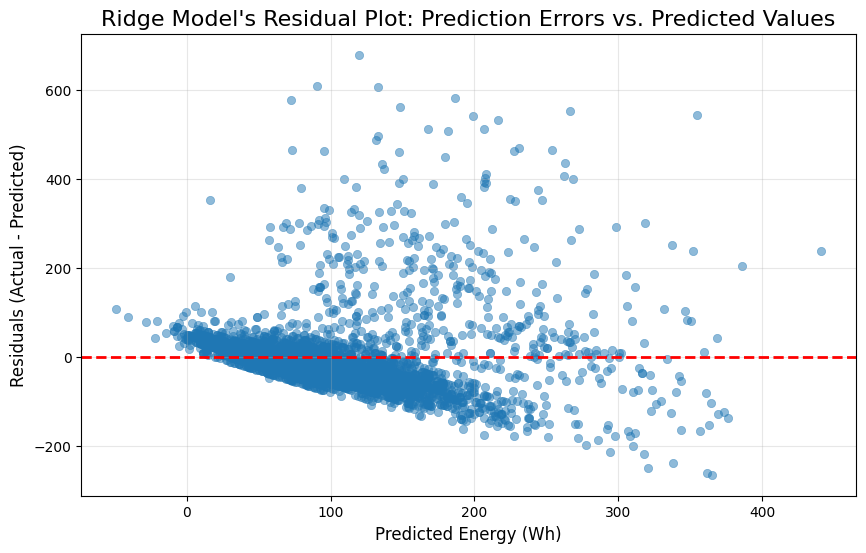

In [57]:
y_pred = ridge.pipeline.predict(ridge.X_test)
plot_residuals(ridge.y_test, y_pred, title="Ridge Model's ")

Most dots are gathered around the zero line, showing a high density there. This means most samples have errors close to zero, and samples with very high or outlier errors are in the minority, not the majority. This alone signals that the model has learned true patterns and is observing a true relation, though these relations aren't enough to put the error as low as we want; the errors are still high.

We can see dots with very high errors appearing on the plot, creating a shotgun-damaged-looking plane. This is proving the 'random noise' theory we talked about earlier in section 4.1. Imagine a vertical line in this plane. For all the dots on the line, the model has predicted the same normal value(like 100 Wh). Most dots are gathered near the red line, meaning their actual number is something close(like 120, 140, 80, etc.), and the model is guessing the pattern correctly. But you can also see a few outlier dots with a very high error(like 700 Wh). These dots are the 'nightmare spikes' we talked about in section 4.1; these dots are affected by parameters not included in our data, more formally, they are affected by noise. These outlier dots are in the minority; they are rebels breaking the pattern. The model listens to the majority of the dots(the dots around the zero point, which show the true pattern). The more the noise is, the harder it becomes for the model to separate the dots that represent the noise and the dots that represent a pattern; it gets confused about which one it must listen to. The noisier the dataset, the more confused the algorithm.

The model has much higher accuracy when the predicted energy is between 0 and 70, but when the predicted value exceeds ~70, the number of outliers increases significantly, and the noise affects energy consumption more severely.

#### 4.2.2 Prediction vs. Actual Values Graph

In [64]:
def plot_prediction_vs_actual(y_test, y_pred, num_samples=100, title=""):
    """
    Plots a subset of predictions vs actuals to visualize tracking performance.
    """
    plt.figure(figsize=(14, 6))
    
    # Take a slice of the data for clarity
    plt.plot(range(num_samples), y_test[:num_samples], label='Actual Energy', color='blue', alpha=0.7)
    plt.plot(range(num_samples), y_pred[:num_samples], label='Predicted Energy', color='red', linestyle='--', linewidth=2)
    
    plt.title(f'{title} Actual vs. Predicted Energy Consumption (First {num_samples} Samples)', fontsize=16)
    plt.xlabel('Sample Index (Time)', fontsize=12)
    plt.ylabel('Energy (Wh)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

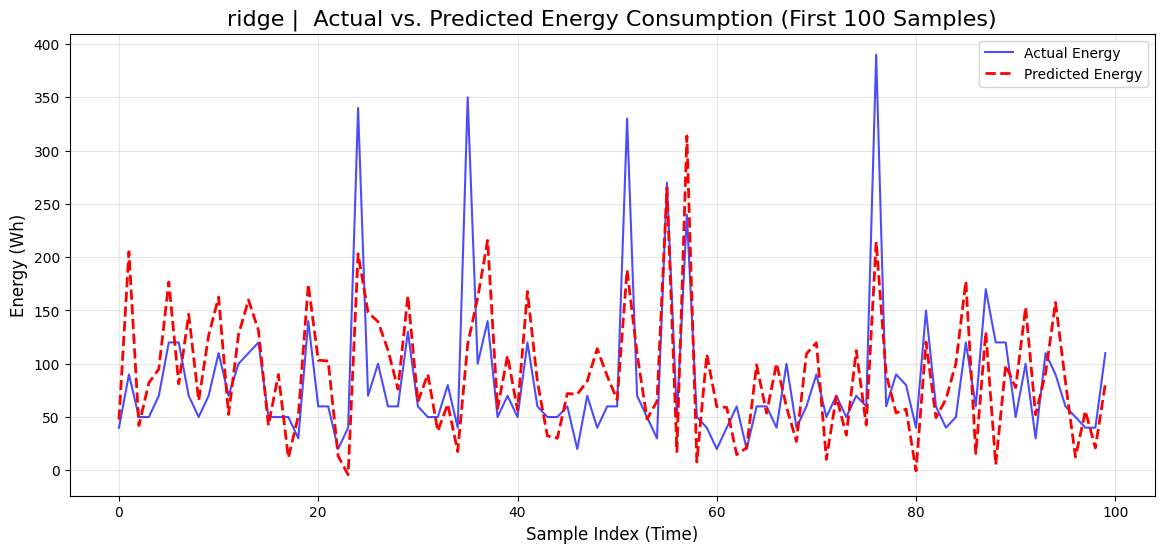

In [65]:
y_pred = ridge.pipeline.predict(ridge.X_test)
plot_prediction_vs_actual(ridge.y_test, y_pred, title="ridge | ")

The plot above shows 100 samples from our test set; For each sample, its actual value(blue line) and the model's prediction are plotted(red dashed line). We can observe that when there is no spike or random event, our model mimics the pattern correctly, it moves up and down at the right time, and predicts close values. It has learned the general pattern, and it can predict close values when everything is going on the typical routine.

The problem arises when sudden jumps happen in energy usage, due to random events and noise, such as near indexes 25, 35, 52, and 76. The energy consumption suddenly jumps, and the model fails to follow that jump; it predicts a number that is far away. These are the *nightmare spikes* we discussed briefly earlier in section 4.1.

When comparing the ridge's graph to the regressor(degree one) model, we notice that the regressor has much poorer performance. Unlike the ridge model, the regressor is struggling to see the pattern; it overpredicts and underpredicts many more times compared to the ridge model. This is because the ridge model is polynomial; it has access to more features(many combined features), hence it has more information. This lets the ridge model see the patterns the regressor can't see, resulting in better learning. This is why it can follow the typical routine's pattern better.

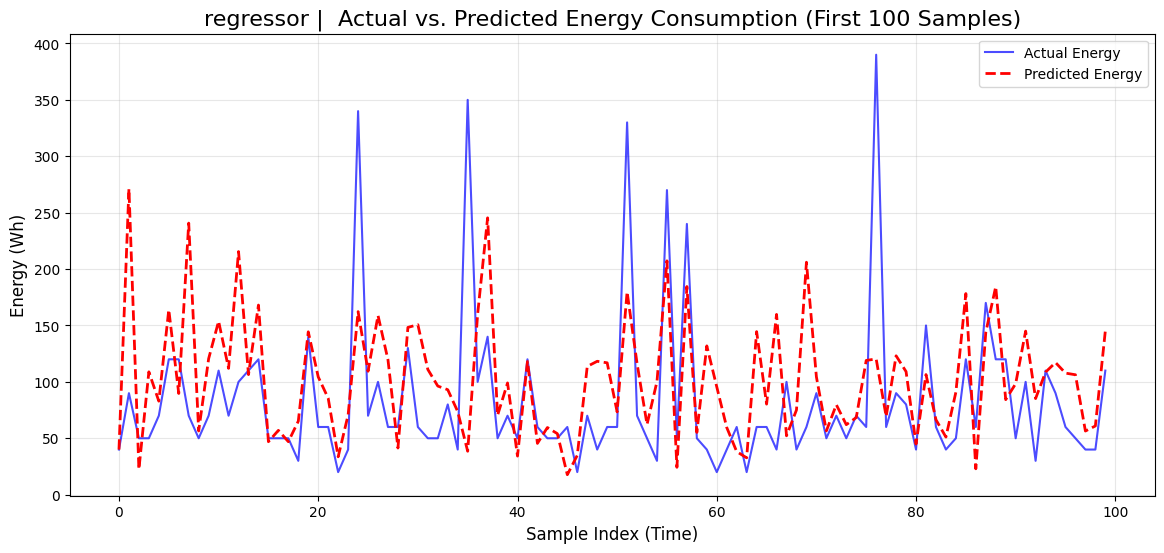

In [66]:
y_pred = regressor.pipeline.predict(regressor.X_test)
plot_prediction_vs_actual(regressor.y_test, y_pred, title="regressor | ")

#### 4.2.3 Feature Importance Graph

In [39]:
def plot_feature_importance(model, feature_names, step, top_n=20, size=(12, 8)):
    """
    Plots the absolute value of coefficients to show feature importance.
    """
    # Extract coefficients
    coefs = model.pipeline.named_steps[step].coef_
    
    # Create a DataFrame for easy plotting
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs,
        'Absolute_Importance': np.abs(coefs)
    })
    
    # Sort by absolute importance
    importance_df = importance_df.sort_values(by='Absolute_Importance', ascending=False).head(top_n)
    
    plt.figure(figsize=size)
    sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'Top {top_n} Feature Coefficients (Ridge Degree 2)', fontsize=16)
    plt.xlabel('Coefficient Value (Magnitude indicates importance)', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17856\690965091.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='viridis')


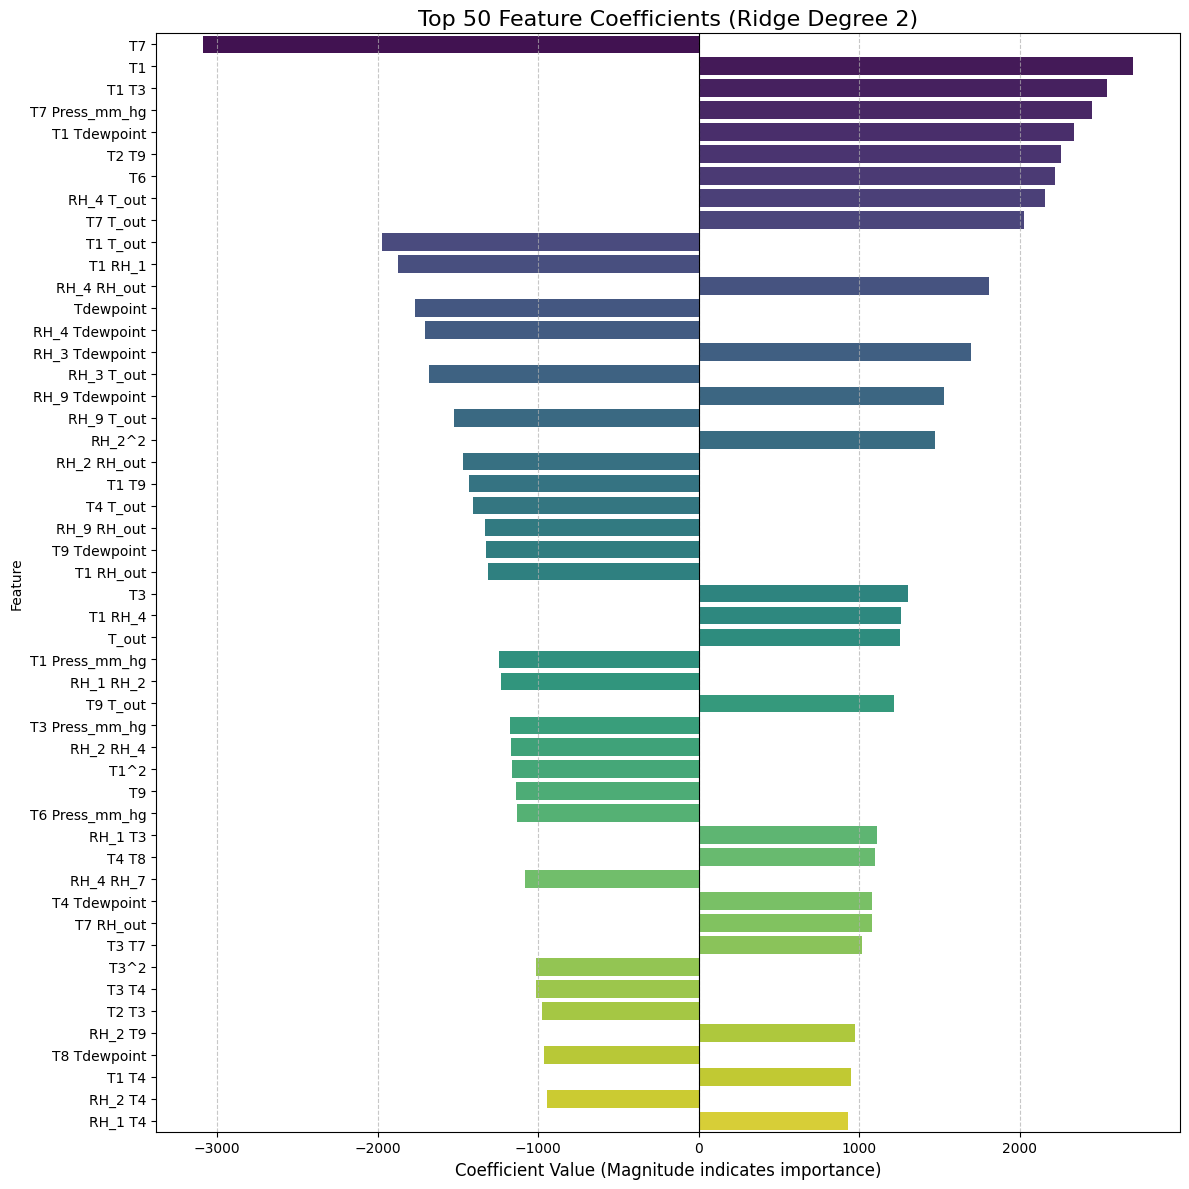

In [62]:
# feature_names = regressor.X_train.columns.tolist()
# plot_feature_importance(regressor, feature_names, "regressor", top_n=80, size=(12, 12))

feature_names = ridge.poly.get_feature_names_out()
plot_feature_importance(ridge, feature_names, "ridge", top_n=50, size=(12, 12))

Among the top 50 features that have the most impact on our target variable, many are combined terms, such as `T1 T3`, `T1 Tdewpoint`, etc. In this dataset, we observe many features that affect the target jointly and not just individually. This may explain why our degree-two models had lower error than our degree-one models: degree-one models did not include combined terms in their X matrix.